In [50]:
import pandas as pd
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv('salesdata.csv')

In [52]:
df.head()

,CompPrice,Income,Advertising,Population,Price,Quality,Age,Education,Urban,US,SalesCat
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Yes
1,111,48,16,260,83,Good,65,10,Yes,Yes,Yes
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Yes
3,117,100,4,466,97,Medium,55,14,Yes,Yes,No
4,141,64,3,340,128,Bad,38,13,Yes,No,No


In [53]:
X = df.drop(['SalesCat'],axis=1)
Y = df['SalesCat']

In [54]:
dt = tree.DecisionTreeClassifier(random_state=99)

In [55]:
# dtmodel = dt.fit(X, Y)

In [56]:
X = pd.get_dummies(X, columns = ['Quality','Urban','US'])

In [57]:
X

,CompPrice,Income,Advertising,Population,Price,Age,Education,Quality_Bad,Quality_Good,Quality_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

In [59]:
X_train.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,Quality_Bad,Quality_Good,Quality_Medium,Urban_No,Urban_Yes,US_No,US_Yes
234,115,62,11,289,129,56,16,0,1,0,1,0,0,1
45,141,63,0,168,135,44,12,1,0,0,0,1,0,1
171,93,106,12,416,55,75,15,0,0,1,0,1,0,1
47,126,98,0,173,108,55,16,1,0,0,0,1,1,0
265,130,35,10,402,129,39,17,1,0,0,0,1,0,1


In [60]:
y_train.head()

234    Yes
45      No
171    Yes
47      No
265     No
Name: SalesCat, dtype: object

In [61]:
dtmodel = dt.fit(X_train, y_train)

In [62]:
train_pred = dtmodel.predict(X_train)

In [63]:
train_pred

array(['Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes',
       'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No',
       'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No',
       'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No',
       'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No',
       'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No',
       'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No',
 

In [64]:
acc = accuracy_score(train_pred, y_train)
acc*100

100.0

In [65]:
test_pred = dtmodel.predict(X_test)

In [66]:
acc = accuracy_score(test_pred, y_test)
acc*100

71.66666666666667

In [67]:
# We observe overfitting above. Lets see the tree if it is complex or not.

In [68]:
text_representation = tree.export_text(dtmodel)
print(text_representation)

|--- feature_8 <= 0.50
|   |--- feature_4 <= 106.50
|   |   |--- feature_0 <= 125.50
|   |   |   |--- feature_5 <= 64.50
|   |   |   |   |--- feature_1 <= 47.50
|   |   |   |   |   |--- feature_5 <= 57.50
|   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- feature_5 >  57.50
|   |   |   |   |   |   |--- feature_2 <= 15.00
|   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |--- feature_2 >  15.00
|   |   |   |   |   |   |   |--- class: No
|   |   |   |   |--- feature_1 >  47.50
|   |   |   |   |   |--- feature_10 <= 0.50
|   |   |   |   |   |   |--- feature_4 <= 86.50
|   |   |   |   |   |   |   |--- feature_3 <= 417.50
|   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |--- feature_3 >  417.50
|   |   |   |   |   |   |   |   |--- feature_3 <= 493.00
|   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |--- feature_3 >  493.00
|   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |-

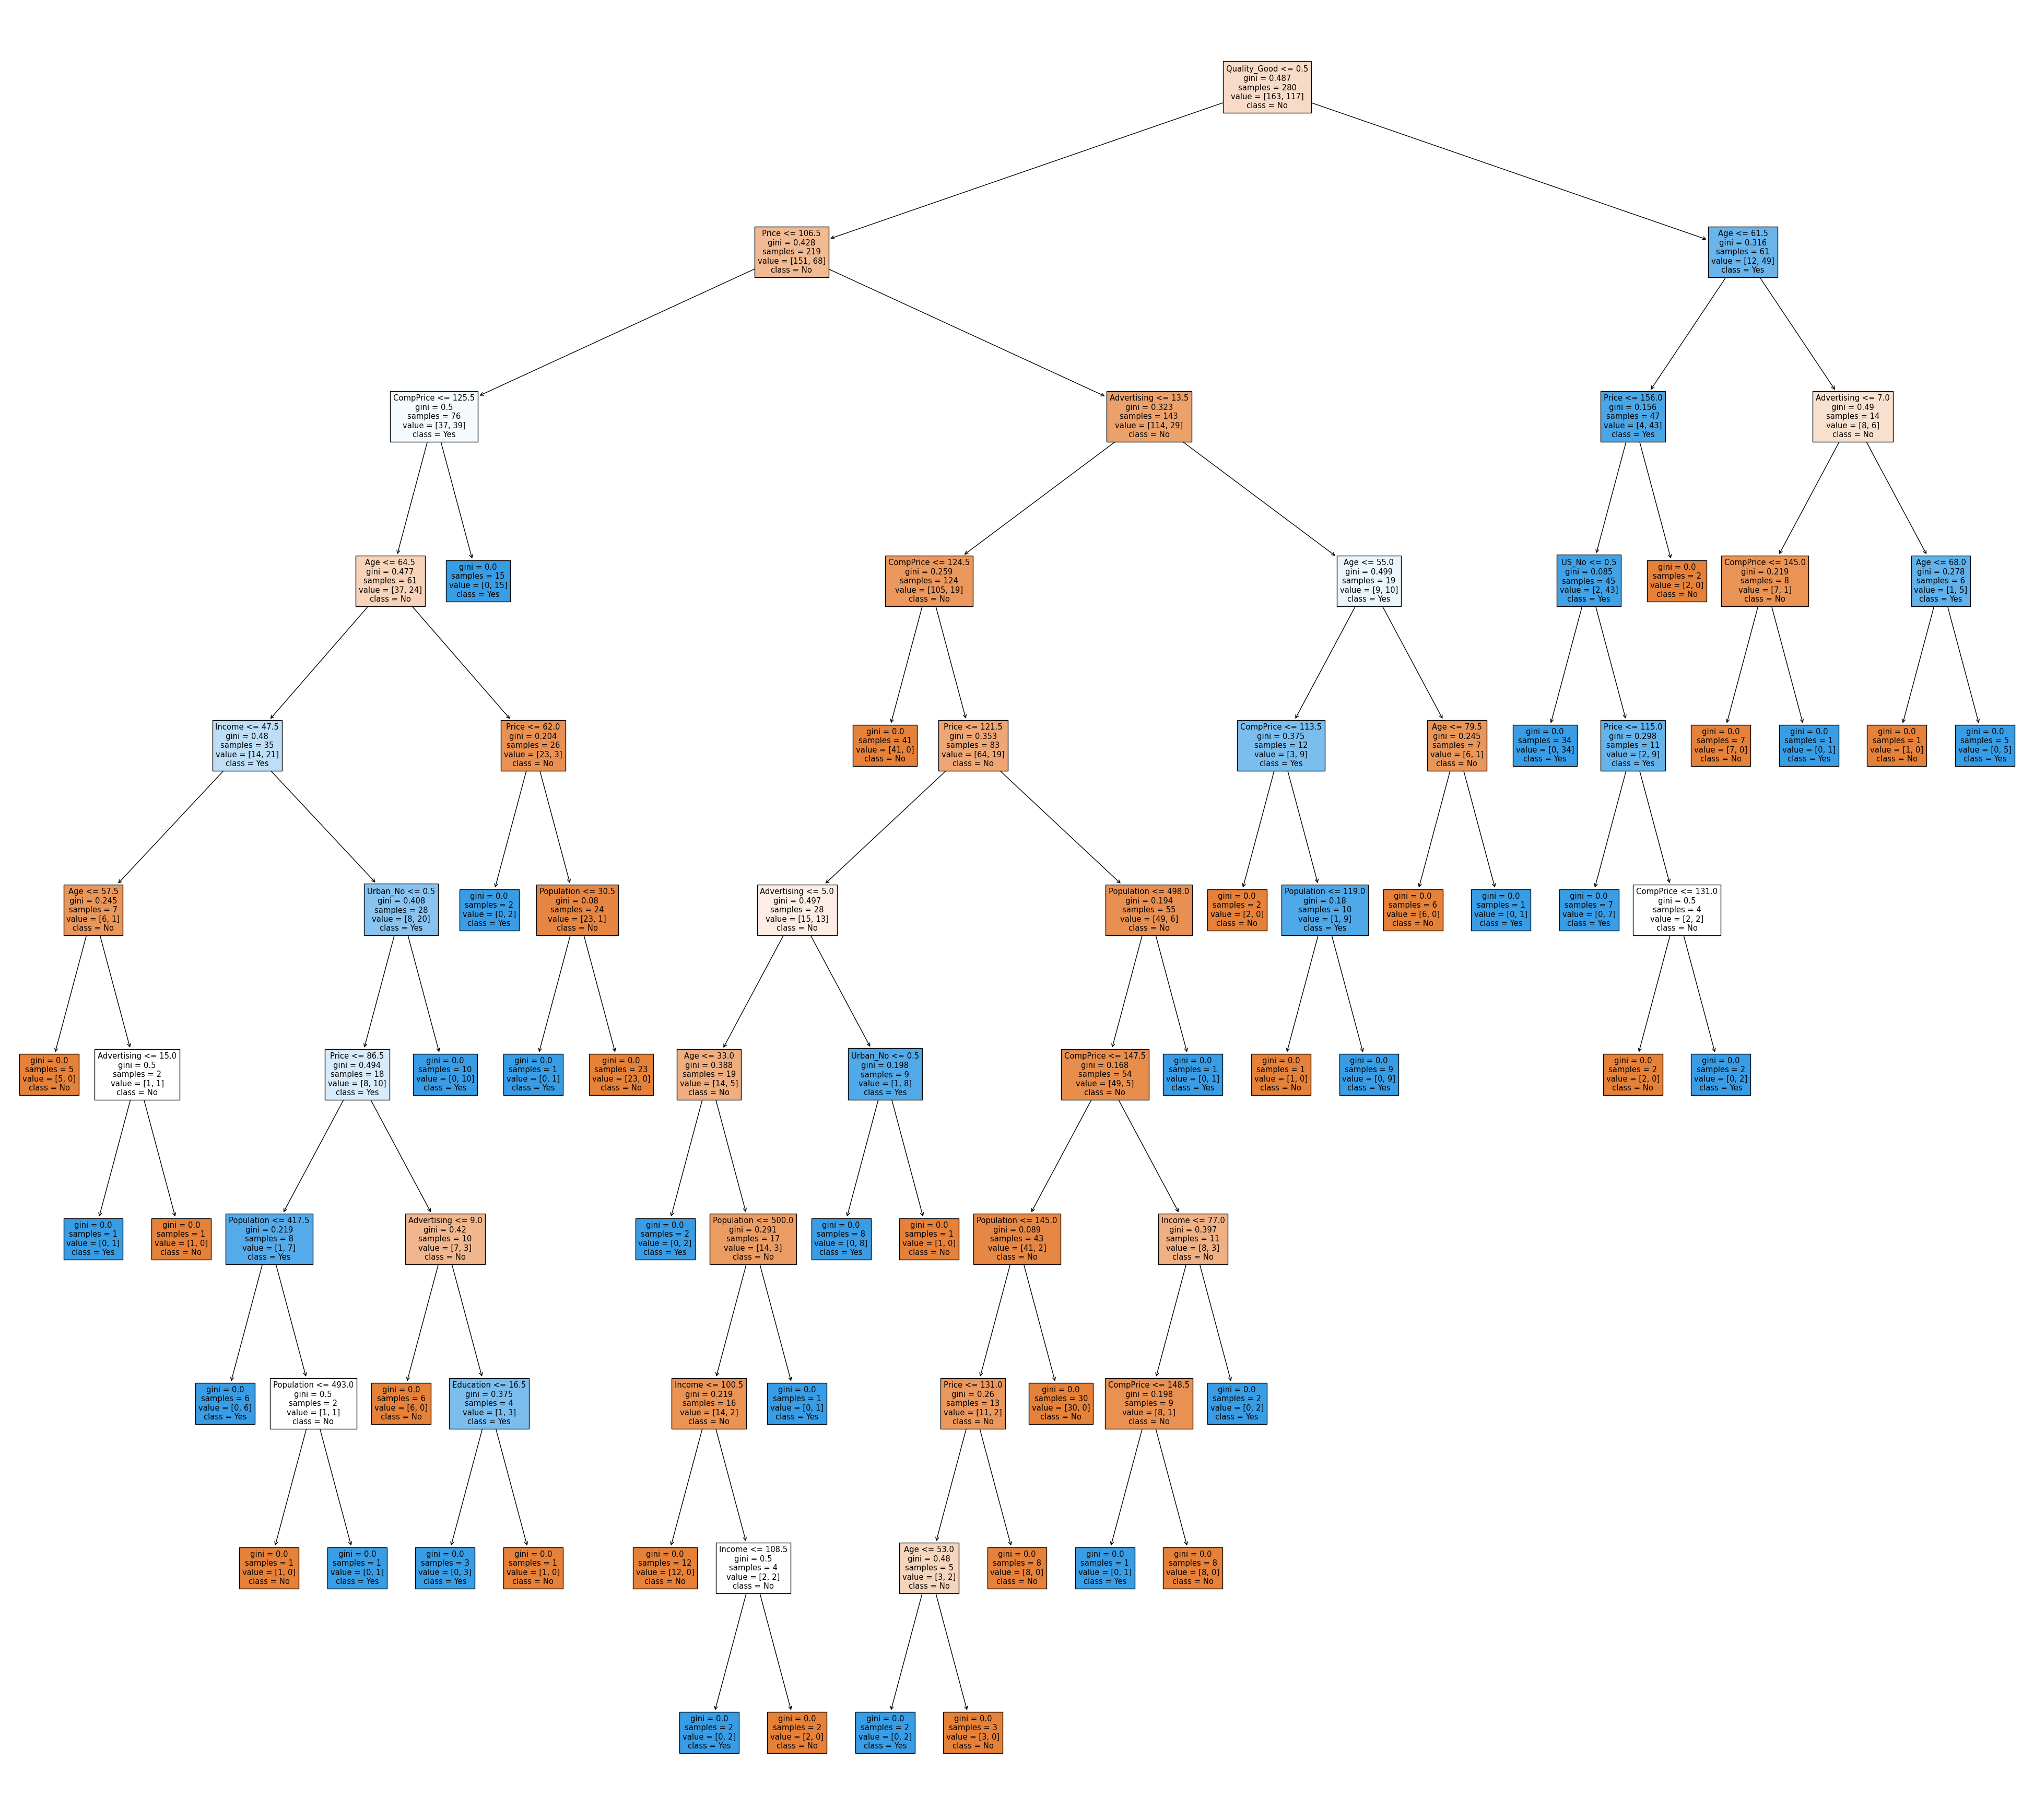

In [69]:
fig = plt.figure(figsize=(50,45))
_ = tree.plot_tree(dtmodel, 
                   feature_names=list(X.columns),  
                   class_names=Y.value_counts().index,
                   filled=True)

In [70]:
dt = tree.DecisionTreeClassifier(criterion='gini',random_state=100)

In [71]:
dtmodel = dt.fit(X_train, y_train)
train_pred = dtmodel.predict(X_train)
acc = accuracy_score(train_pred, y_train)
acc*100

100.0

In [72]:
test_pred = dtmodel.predict(X_test)
acc = accuracy_score(test_pred, y_test)
acc*100

73.33333333333333

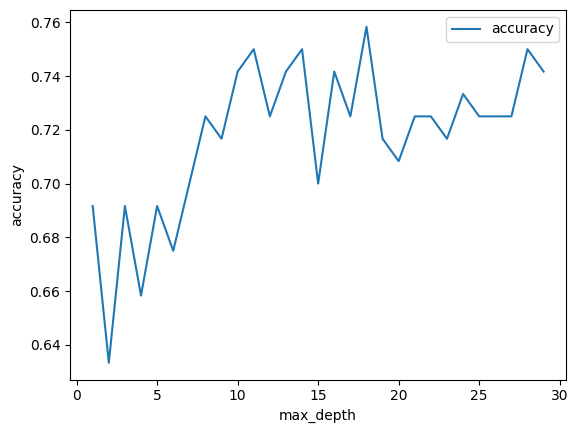

In [73]:
max_depth = []
acc = []
for i in range(1,30):
    dtree = tree.DecisionTreeClassifier(criterion='gini',max_depth=i)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    acc.append(accuracy_score(y_test, pred))
    max_depth.append(i)
    
d = pd.DataFrame({'accuracy':pd.Series(acc),'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','accuracy', data=d)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

In [74]:
# Pruned Model

In [75]:
dt = tree.DecisionTreeClassifier(criterion='gini',max_depth=12)

In [76]:
dtmodel = dt.fit(X_train, y_train)
train_pred = dtmodel.predict(X_train)
acc = accuracy_score(train_pred, y_train)
acc*100

100.0

In [77]:
test_pred = dtmodel.predict(X_test)
acc = accuracy_score(test_pred, y_test)
acc*100

72.5

In [78]:
# Pruning helped increasing the accuracy on test data

### Random Forest

In [79]:
rf = RandomForestClassifier(n_estimators=100)

In [80]:
rfmodel = rf.fit(X_train, y_train)
train_pred = rfmodel.predict(X_train)
acc = accuracy_score(train_pred, y_train)
acc*100

100.0

In [81]:
test_pred = rfmodel.predict(X_test)
acc = accuracy_score(test_pred, y_test)
acc*100

80.83333333333333

In [82]:
## Better than Decision Trees

In [83]:
rfmodel.feature_importances_

array([0.10814241, 0.09635917, 0.1090448 , 0.08883146, 0.18471753,
       0.12825326, 0.05910606, 0.04941446, 0.10105467, 0.02548088,
       0.01095372, 0.00936381, 0.01418909, 0.01508869])

<BarContainer object of 14 artists>

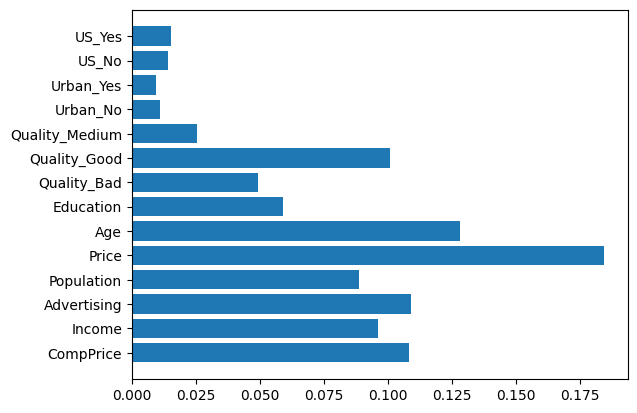

In [84]:
plt.barh(list(X.columns), rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

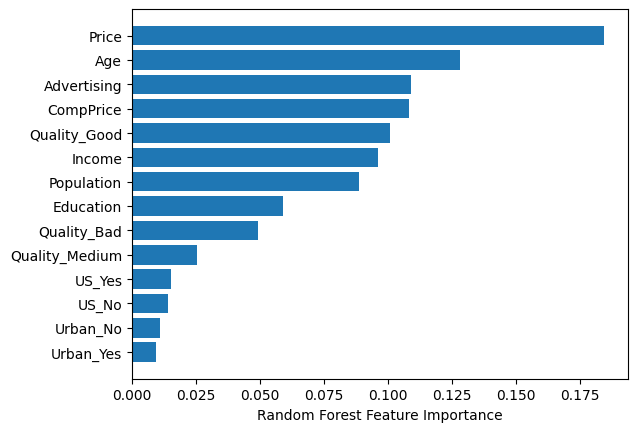

In [85]:
sorted_idx = rfmodel.feature_importances_.argsort()
plt.barh(list(X.columns[sorted_idx]), rfmodel.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [86]:
## Cross Validation

In [87]:
scores = cross_val_score(rfmodel, X, Y, cv=5)
scores

array([0.8625, 0.75  , 0.8125, 0.775 , 0.8   ])

In [88]:
scores.mean()

0.8

In [89]:
cm = confusion_matrix(y_train,train_pred)
cm

array([[163,   0],
       [  0, 117]], dtype=int64)

In [90]:
cm2 = confusion_matrix(y_test,test_pred)
cm2

array([[65,  8],
       [15, 32]], dtype=int64)

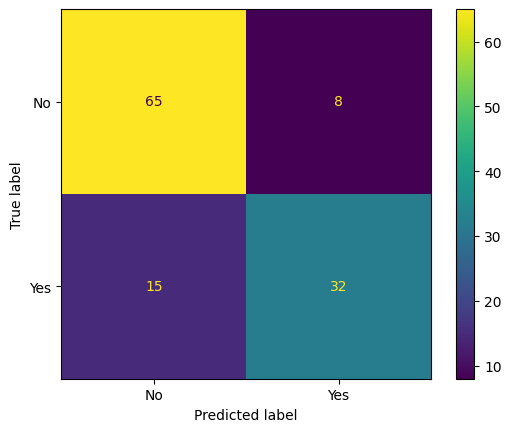

In [91]:
cp = ConfusionMatrixDisplay(cm2,display_labels=rfmodel.classes_)
cp.plot()
# 63 10 15 32

### Whisky Data

In [92]:
wdata = pd.read_csv('whiskeydataset.csv')

In [93]:
wdata.head()

,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
0,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2
1,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2
2,Balblair,2,3,2,1,0,0,2,0,2,1,2,1
3,Balmenach,4,3,2,0,0,2,1,3,3,0,1,2
4,Dufftown,2,3,1,1,0,0,0,0,1,2,2,2


In [94]:
WX = wdata.drop(['Distillery'],axis=1)
WY = wdata['Distillery']

In [95]:
dt2 = tree.DecisionTreeClassifier(criterion='gini', min_samples_split=2, min_samples_leaf=1,random_state=99)

In [96]:
dtmodel2 = dt2.fit(WX, WY)

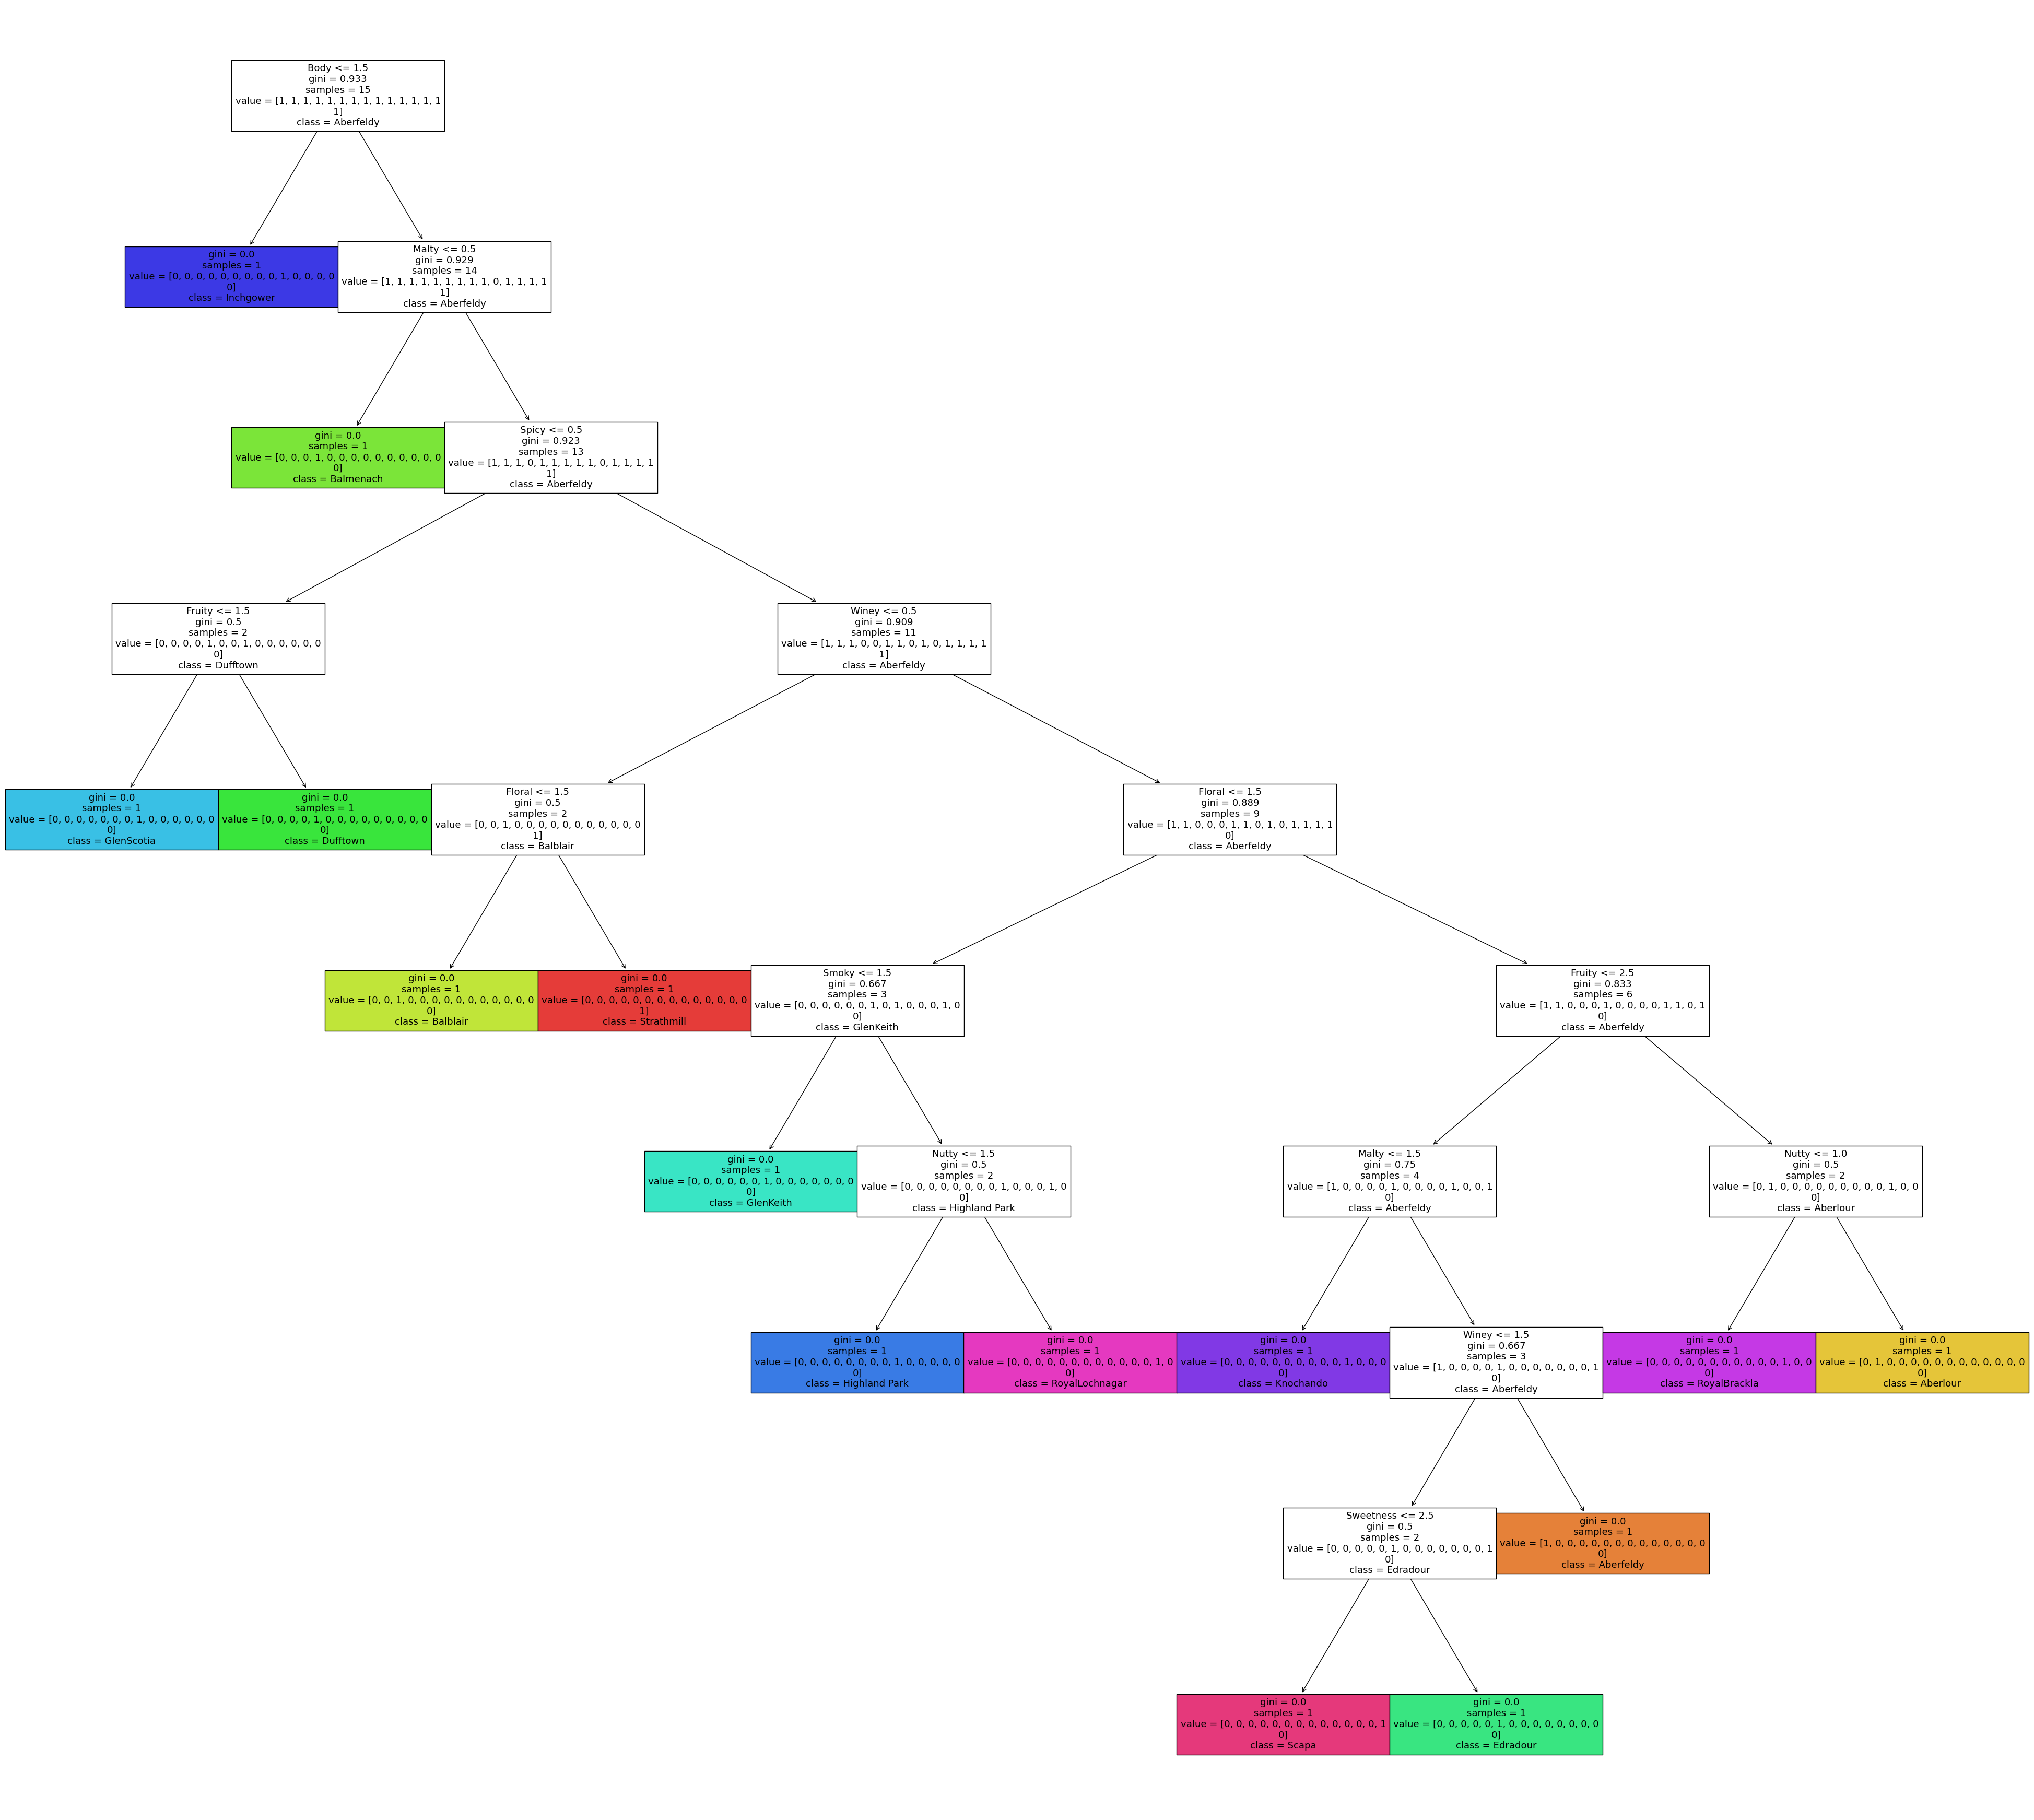

In [97]:
fig = plt.figure(figsize=(50,45))
_ = tree.plot_tree(dtmodel2, 
                   feature_names=list(WX.columns),  
                   class_names=WY.value_counts().index,
                   filled=True)

In [98]:
fig.savefig("decistion_tree.png")